# Stochastic Processes: Wiener Process Simulation

***Null Space - PGDM Analytics and Research Cell***

*This project is about using the Wiener process (Geometric Brownian motion) to simulate Google's daily stock prices and compare them to actual values. The Drift and Variance rates are calculated and the associated plots are also shown.*


# Building the Theory for the Wiener process

The Wiener process is a kind of Markov stochastic process with a mean change of $0$ and variance of $1$ per year. This is commonly referred to as **Brownian motion**. A variable $z$ follows a Wiener process if the following properties hold:

1. The change $\Delta z$ during a small period of time $\Delta t$ is given by following, where $\epsilon$ follows a standard normal distribution $\phi(0,1)$.

$$\Delta z = \epsilon \sqrt{\Delta t}$$

2. The value of $\Delta z$ for any two different short intervals of time $\Delta t$ are independent. 

3. We say that $\Delta z$ has a normal distribution with: Mean of $\Delta z = 0$. Variance of $\Delta z = \Delta t$. Standard deviation of $\Delta z = \sqrt{\Delta t}$. 

Now we consider a change in value of $z$ over a long time period $T$. This can be denoted as $z(T) - z(0)$. This could be thought of as the sum of changes in $z$ over $N$ small time intervals $\Delta t$ such that:

$$N = \dfrac{T}{\Delta t}$$

$$z(T) - z(0) = \sum_{i=1}^{N}\epsilon_i\sqrt{\Delta t}$$

Mean of $[z(T) - z(0)] = 0$. Variance of $[z(T) - z(0)] = N\Delta t = T$. Standard deviation of $[z(T) - z(0)] = \sqrt{T}$. We therefore refer to $\Delta z$ as a Wiener process

## Generalized Wiener process

The mean change for a stochastic process per unit time is called the **drift rate** and the variance per unit time is called the **variance rate**. So far the Wiener process $dz$ we have seen above has a drift rate of $0$ and variance rate of $1$. The drift rate of $0$ implies that the expected future value of $z$ at any future time is equal to its current value. Variance rate of $1$ implies that the variance of change in $z$ in an interval of length $T$ is $T$. A generalized Wiener process for variable $x$ can be defined in terms of $dz$ as follows:

$$dx = adt + bdz$$

Therefore in a small time interval $\Delta t$ the change $\Delta x$ in $x$ is given by:

$$\Delta x = a\Delta t + b\epsilon \sqrt{\Delta t}$$

As before, the $\epsilon$ terms are distributed standard normally. We say that $\Delta x$ follows a normal distribution with: Mean of $\Delta x = a\Delta t$. Variance of $\Delta x = b^2\Delta t$. Standard deviation of $\Delta x = b\sqrt{\Delta t}$. And on a similar note, the change in variable $x$ over a time interval $T$ would then be: Mean of change in $x = aT$. Variance of change in $x = b^2T$. Standard deviation of change in $x = b\sqrt{T}$. Basically we say that a **generalized Wiener process has a drift rate of $a$ and a variance rate of $b^2$ per unit time**.

## Modeling stock prices

$S_0$ and $S_T$ are the stock prices at time $0$ and $T$ respectively. An assumption is that the variability of percentage return in a short span of time $\Delta t$ is the same irrespective of the stock price. With this we get the following relation:

$$dS = \mu S dt + \sigma S dz$$

$$\dfrac{dS}{S} = \mu dt + \sigma dz$$

Where $\mu$ is the expected stock return and $\sigma$ is the volatility of the stock price. 

&nbsp;

# A Toy program

This toy program basically simulates a generalized Wiener process plot with a constant drift rate of $0.3$ and a variance rate of $1.5$. The $\epsilon$ values are randomly generated from a **standard normal distribution** and iteratively, the time intervals are increased. With each iteration, the change in the $x$ variable is computed. 

&nbsp;

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from scipy.stats import norm

In [36]:
a = 0.3
b = 1.5

In [38]:
dX = {}
X = {}
X[0] = 10
trend = {}
wiener = {}
for i in range(2, 12):
    dX[i-1] = a*(i-1) + b*(np.random.normal(0, 1)*np.sqrt(i-1))
    X[i-1] = X[0] + dX[i-1]
    trend[i-1] = a*(i-1)
    wiener[i-1] = b*(np.random.normal(0, 1)*np.sqrt(i-1))

In [39]:
X

{0: 10,
 1: 9.768459023550257,
 2: 10.394844205501553,
 3: 7.828202766277127,
 4: 13.408516224777856,
 5: 12.991460143923561,
 6: 11.32979980888965,
 7: 10.594314096648773,
 8: 17.795307845472458,
 9: 14.18892534933741,
 10: 14.164123467877047}

In [40]:
dX

{1: -0.23154097644974275,
 2: 0.3948442055015525,
 3: -2.171797233722873,
 4: 3.4085162247778564,
 5: 2.99146014392356,
 6: 1.3297998088896492,
 7: 0.5943140966487723,
 8: 7.795307845472458,
 9: 4.188925349337409,
 10: 4.164123467877047}

In [41]:
trend

{1: 0.3,
 2: 0.6,
 3: 0.8999999999999999,
 4: 1.2,
 5: 1.5,
 6: 1.7999999999999998,
 7: 2.1,
 8: 2.4,
 9: 2.6999999999999997,
 10: 3.0}

In [42]:
wiener

{1: 0.056812769108584626,
 2: -2.4171065668255984,
 3: -1.7872551202271423,
 4: 5.4315785393868845,
 5: -0.5701033388263694,
 6: 0.804668312402453,
 7: -4.145090063803023,
 8: -4.68511153745596,
 9: 4.032845588476683,
 10: 4.04241999570019}

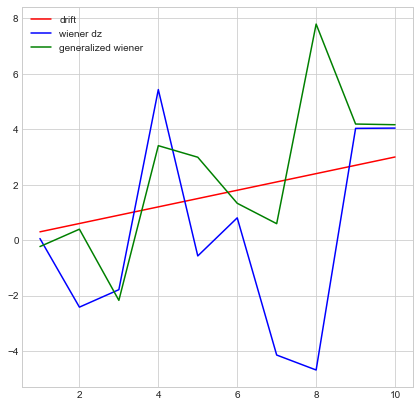

In [47]:
plt.figure(figsize=(7, 7))
plt.plot(list(trend.keys()), list(trend.values()),'r', label='drift')
plt.plot(list(wiener.keys()), list(wiener.values()), 'b', label='wiener dz')
plt.plot(list(dX.keys()), list(dX.values()), 'g', label='generalized wiener')
plt.legend(loc='upper left')

&nbsp;

# Application: Predicting Google stock price

The idea is to use the **Geometric Brownian motion** concepts to model Google's stock price and see how the predicted daily price compares with the actual prices observed. Here are the steps followed:

1. We first import Google's price data from **Yahoo Finance website** from $2004$ till $2019$. 

2. We then compute the year wise percent change in prices which would give us an **estimate of the annual returns** on Google's stock.

3. The annual returns so obtained are then **averaged out** to obtain the **constant drift** term $\mu$. 

4. Similarly, the annual **standard deviation** is also calculated to get the **constant variance rate** term $\sigma$. 

5. We then apply the the following model to predict daily changes in Google's stock price. 

$$dS = \mu S dt + \sigma S dz$$

6. After initializing a stock price $S_0$ we iteratively keep on adding the stock price changes predicted by the Geometric Brownian motion model and then compare the results with actual values (corresponding to the appropriate time period).

&nbsp;

In [64]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start=2004, end=2020, data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


&nbsp;

- This code block extracts the **Adjacent Close** price for the Google stock Data.

&nbsp;

In [147]:
df_g = goog['Adj Close']
df_g

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239193
2004-08-25      52.802086
                 ...     
2019-12-24    1343.560059
2019-12-26    1360.400024
2019-12-27    1351.890015
2019-12-30    1336.140015
2019-12-31    1337.020020
Name: Adj Close, Length: 3869, dtype: float64

&nbsp;

- In the following code block we obtain the **business year end prices** for each year, with the help of which we can compute the annual returns.

&nbsp;

In [74]:
df = pd.Series(df_g, index = pd.date_range('19/8/2004', '31/12/2019', freq='BA'))

&nbsp;

- In the following $2$ code blocks we are calculating the **average annual returns** and the **standard deviation** of the annual returns and storing them in variables $\mu$ and $\sigma$ respectively. And we are taking our initial (current value) price which is our $S_0$.

&nbsp;

In [148]:
mu = df.pct_change().mean()
sigma = df.pct_change().std()
mu, sigma

(0.2658716789177214, 0.4344692228009562)

In [149]:
S_0 = df_g.loc['2/12/2019']
S_0

1121.3699951171875

In [150]:
dat1 = df_g.loc['2/12/2019': ]

&nbsp;

- In the code block below we run the **Wiener process model** to generate $101$ instances of Google's **daily stock price changes**. The changes are iteratively added to the initial $S_0$ which gives us the **predicted daily prices**. Consequently, a **Wiener process plot is also shown**.

&nbsp;

In [117]:
dS = {}
S = {}
S[0] = S_0
trend_g = {}
wiener_g = {}
for i in range(2, 102):
    dS[i-1] = mu*0.0028*(i-1)*S_0 + sigma*S_0*(np.random.normal(0, 1)*0.0028*np.sqrt(i-1))
    S[i-1] = S[0] + dS[i-1]
    trend_g[i-1] = mu*(i-1)*0.0028*S_0
    wiener_g[i-1] = sigma*(np.random.normal(0, 1)*0.0028*np.sqrt(i-1))*S_0

In [120]:
S

{0: 1121.3699951171875,
 1: 1125.794748503733,
 2: 1125.7386689932941,
 3: 1124.9781936177355,
 4: 1124.8999406271084,
 5: 1131.2264109077928,
 6: 1125.9551460530788,
 7: 1118.7920760448192,
 8: 1126.3756122756226,
 9: 1125.0634122381755,
 10: 1131.320567437993,
 11: 1131.911470429975,
 12: 1123.0500536910467,
 13: 1132.9172809675233,
 14: 1126.9359611234256,
 15: 1141.4378353449288,
 16: 1138.418563246932,
 17: 1141.6647342204178,
 18: 1128.2114417660978,
 19: 1136.374395384772,
 20: 1141.9098846541947,
 21: 1132.2558421436681,
 22: 1138.670315621749,
 23: 1142.243780058346,
 24: 1140.3622011061125,
 25: 1153.1037522785105,
 26: 1136.6293821689883,
 27: 1160.6211250312917,
 28: 1136.9702214320532,
 29: 1146.6970831017843,
 30: 1148.6197312439717,
 31: 1140.4291206731343,
 32: 1154.6657959566905,
 33: 1141.0095424592025,
 34: 1141.2517898943006,
 35: 1146.8848651283301,
 36: 1153.8571040606303,
 37: 1153.4781471445256,
 38: 1149.627983741951,
 39: 1158.8378306862996,
 40: 1160.76859037

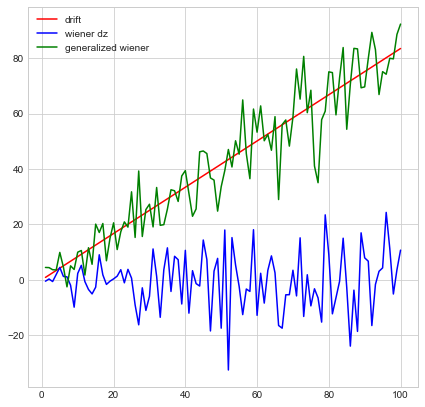

In [119]:
plt.figure(figsize=(7, 7))
plt.plot(list(trend_g.keys()), list(trend_g.values()),'r', label='drift')
plt.plot(list(wiener_g.keys()), list(wiener_g.values()), 'b', label='wiener dz')
plt.plot(list(dS.keys()), list(dS.values()), 'g', label='generalized wiener')
plt.legend(loc='upper left')

&nbsp;

- We finally create a DataFrame wherein the **First column contains actual daily prices** of Google stock from the date $2-12-2019$ onwards. The **Second column contains the predicted daily prices** using the Wiener process simulations.

&nbsp;

In [151]:
data = pd.DataFrame({'actual': dat1.iloc[1:102].values, 
                      'predicted': pd.Series(S).values })
data

,actual,predicted
0,1120.160034,1121.369995
1,1121.670044,1125.794749
2,1113.650024,1125.738669
3,1118.560059,1124.978194
4,1113.800049,1124.899941
...,...,...
96,1111.250000,1195.559206
97,1121.579956,1201.326357
98,1131.589966,1201.099870
99,1116.349976,1209.952291
